In [348]:
import pandas as pd
import numpy as np
import datetime
import re
import string

Set display option

In [349]:
# display full column
pd.set_option('display.max_colwidth', None)

# display option all rows # default value 50
pd.set_option('display.max_rows', None)

Get input for data file of which year to run (as main file)

In [350]:
# read all data frame
df_2020 = pd.read_parquet('provider_failures_2020.parquet', engine='pyarrow')
df_2019 = pd.read_parquet('provider_failures_2019.parquet', engine='pyarrow')
df_2018 = pd.read_parquet('provider_failures_2018.parquet', engine='pyarrow')

initial_df = df_2020[0:0]
utc_time = 0
year_name = 0

g = input('Which year data should be analysed: \n 1) 2020  2) 2019 3) 2018 . Type number example 2 for 2019' )

if (g == '1'):    # 2020
    initial_df = df_2020
    utc_time = 1577836800
    year_name = 2020

elif (g == '2'):  # 2019
    initial_df = df_2019
    utc_time = 1546300800
    year_name = 2019

elif (g == '3'):  # 2018
    initial_df = df_2018
    utc_time = 1514764800
    year_name = 2018

print('Input is', g)

# initial_df

Input is 1


In [351]:
no_of_rows = len(initial_df)
print('no_of_rows: ', no_of_rows)

no_of_cloumn = len(initial_df.columns)
print('no_of_cloumn: ', no_of_cloumn)

no_of_rows:  639
no_of_cloumn:  12


In [352]:
temp_df = initial_df
# convert to no decimal or no scientific notation representation
temp_df['event_start_time'] = temp_df['event_start_time'].apply(lambda x: '%.0f' % x)
temp_df['event_end_time'] = temp_df['event_end_time'].apply(lambda x: '%.0f' % x)
temp_df['first_notification'] = temp_df['first_notification'].apply(lambda x: '%.0f' % x)
temp_df['last_notification'] = temp_df['last_notification'].apply(lambda x: '%.0f' % x)

Convert different representations into single representation

In [353]:
# make data better using find() 

i = 0
j = 0

temp_df = temp_df.reset_index(drop=True)

print("Here in 2020 = ",len(temp_df))

# temp_df['event_start_time'] = temp_df['event_start_time'].astype(str)

while (i < len (temp_df) ):

    # location

    # 2020
    if re.search('West Central US', str(temp_df.iat[i,2]) , re.IGNORECASE):
        print('Match West Central US = ', i)
        temp_df.iat[i,2] = 'West Central US'
    
    elif re.search('US Government Cloud', str(temp_df.iat[i,2]) , re.IGNORECASE):    # if there is a match
        print('Match US Government Cloud = ', i)
        temp_df.iat[i,2] = 'US Government Cloud'

    elif re.search('East US', str(temp_df.iat[i,2]) , re.IGNORECASE):    # if there is a match
        print('Match East US = ', i)
        temp_df.iat[i,2] = 'East US'

    elif re.search('South Central US', str(temp_df.iat[i,2]) , re.IGNORECASE):    # if there is a match
        print('Match South Central US = ', i)
        temp_df.iat[i,2] = 'South Central US'

    elif re.search('global', str(temp_df.iat[i,2]) , re.IGNORECASE):    # if there is a match
        print('Match global or Global = ', i)     # note that we ignore the case when checking match
        temp_df.iat[i,2] = 'Multi-region' # instaed of Global 


    # 2019
    elif re.search('West US 2', str(temp_df.iat[i,2]) , re.IGNORECASE):    # if there is a match
        print('Match West US 2 = ', i)
        temp_df.iat[i,2] = 'West US 2'

    elif re.search('North America', str(temp_df.iat[i,2]) , re.IGNORECASE):    # if there is a match
        print('Match North America = ', i)
        temp_df.iat[i,2] = 'North America'

    elif re.search('West Europe', str(temp_df.iat[i,2]) , re.IGNORECASE):    # if there is a match
        print('Match West Europe = ', i)
        temp_df.iat[i,2] = 'West Europe'

    elif re.search('Australia East/Australia Southeast', str(temp_df.iat[i,2]) , re.IGNORECASE):    # if there is a match
        print('Match Australia East/Australia Southeast = ', i)
        temp_df.iat[i,2] = 'Australia Southeast / Australia East'

    elif re.search('Azure Front Door Service and Azure CDN', str(temp_df.iat[i,2]) , re.IGNORECASE):    # if there is a match
        print('Match Australia Azure Front Door Service and Azure CDN = ', i)
        temp_df.iat[i,2] = 'Azure Front Door Service and Azure CDN' # remove things if there are extra ahead of this

    elif re.search('Azure Kubernetes Service', str(temp_df.iat[i,2]) , re.IGNORECASE):    # if there is a match
        print('Match Azure Kubernetes Service = ', i)
        temp_df.iat[i,2] = 'Azure Kubernetes Service'

    elif re.search('Virtual Machines and Azure Databricks', str(temp_df.iat[i,2]) , re.IGNORECASE):    # if there is a match
        print('Match Virtual Machines and Azure Databricks = ', i)
        temp_df.iat[i,2] = 'Virtual Machines and Azure Databricks'

    elif re.search('West US', str(temp_df.iat[i,2]) , re.IGNORECASE):    # if there is a match
        print('Match West US = ', i)
        temp_df.iat[i,2] = 'US-West'

    # 2018
    elif re.search('North Europe', str(temp_df.iat[i,2]) , re.IGNORECASE): 
        print('Match North Europe = ', i)
        temp_df.iat[i,2] = 'North Europe'   # remove things if there are extra ahead of this

    elif re.search('Southeast Asia', str(temp_df.iat[i,2]) , re.IGNORECASE): 
        print('Match Southeast Asia = ', i)
        temp_df.iat[i,2] = 'South East Asia'

    elif re.search('UK South/UK West', str(temp_df.iat[i,2]) , re.IGNORECASE) or re.search('UK South and UK West', str(temp_df.iat[i,2]) , re.IGNORECASE): 
        print('Match UK South/UK West or ( UK South and UK West ) = ', i)
        temp_df.iat[i,2] = 'UK South / UK West' 

    elif re.search('West US', str(temp_df.iat[i,2]) , re.IGNORECASE):    
        print('Match West US = ', i)
        temp_df.iat[i,2] = 'West US'

    elif re.search('West and South India', str(temp_df.iat[i,2]) , re.IGNORECASE):   
        print('Match West and South India = ', i)
        temp_df.iat[i,2] = 'West India and South India'


    # service_name 

    # 2020
    if re.search('Microsoft Government Cloud resources', str(temp_df.iat[i,1]) , re.IGNORECASE):    # if there is a match
        print('Match Microsoft Government Cloud resources = ', i)
        temp_df.iat[i,1] = 'Microsoft Government Cloud resources'

    elif re.search('Azure Portal', str(temp_df.iat[i,1]) , re.IGNORECASE):    # if there is a match
        print('Match Azure Portal = ', i)
        temp_df.iat[i,1] = 'Azure Portal'

    elif re.search('Azure connectivity issues', str(temp_df.iat[i,1]) , re.IGNORECASE):    # if there is a match
        print('Match Azure connectivity issues = ', i)
        temp_df.iat[i,1] = 'Azure connectivity issues'

    elif re.search('MSA Login Failures', str(temp_df.iat[i,1]) , re.IGNORECASE):    # if there is a match
        print('Match MSA Login Failures = ', i)
        temp_df.iat[i,1] = 'MSA Login Failures'

    elif re.search('Google Cloud infrastructure components', str(temp_df.iat[i,1]) , re.IGNORECASE):    # if there is a match
        print('Match Google Cloud infrastructure components = ', i)
        temp_df.iat[i,1] = 'Google Cloud Infrastructure Components'

    # 2019

    elif re.search('Network Degradation', str(temp_df.iat[i,1]) , re.IGNORECASE):    # if there is a match
        print('Match Network Degradation = ', i)
        temp_df.iat[i,1] = 'Network'    # this should come before the networking elif statement

    elif re.search('Networking', str(temp_df.iat[i,1]) , re.IGNORECASE):    # if there is a match
        print('Match MSA Networking = ', i)
        temp_df.iat[i,1] = 'Network'

    elif re.search('AWS IoT', str(temp_df.iat[i,1]) , re.IGNORECASE):    # if there is a match
        print('Match AWS IoT = ', i)
        temp_df.iat[i,1] = 'AWS IoT'

    elif re.search('SQL services', str(temp_df.iat[i,1]) , re.IGNORECASE):    # if there is a match
        print('Match SQL services = ', i)
        temp_df.iat[i,1] = 'SQL Services'

    elif re.search('Azure Front Door Service and Azure CDN', str(temp_df.iat[i,1]) , re.IGNORECASE):    # if there is a match
        print('Match Azure Front Door Service and Azure CDN = ', i)
        temp_df.iat[i,1] = 'Azure Front Door Service and Azure CDN'

    elif re.search('Virtual Machines and Azure Databricks', str(temp_df.iat[i,1]) , re.IGNORECASE):    # if there is a match
        print('Match Virtual Machines and Azure Databricks = ', i)
        temp_df.iat[i,1] = 'Virtual Machines and Azure Databricks'

    # 2018

    elif re.search('Azure Data Lake Store/Data Lake Analytics', str(temp_df.iat[i,1]) , re.IGNORECASE):    # if there is a match
        print('Match Azure Data Lake Store/Data Lake Analytics = ', i)
        temp_df.iat[i,1] = 'Azure Data Lake Store / Data Lake Analytics'

    elif re.search('App Service and Azure Functions', str(temp_df.iat[i,1]) , re.IGNORECASE) or re.search('App Service &amp; Function Apps', str(temp_df.iat[i,1]) , re.IGNORECASE)  or re.search('App Service and Function Apps', str(temp_df.iat[i,1]) , re.IGNORECASE): 
        print('Match App Service and Azure Functions = ', i)
        temp_df.iat[i,1] = 'Azure App Service and Functions App'

    elif re.search('Amazon EC2 Systems Manager', str(temp_df.iat[i,1]) , re.IGNORECASE) or re.search('AWS Systems Manager', str(temp_df.iat[i,1]) , re.IGNORECASE):   
        print('Match Amazon EC2 Systems Manager or AWS Systems Manager  = ', i)
        temp_df.iat[i,1] = 'AWS Systems Manager'


    i = i + 1


Here in 2020 =  639
Match Amazon EC2 Systems Manager or AWS Systems Manager  =  8
Match global or Global =  19
Match global or Global =  21
Match global or Global =  25
Match AWS IoT =  27
Match global or Global =  28
Match global or Global =  29
Match global or Global =  30
Match global or Global =  33
Match global or Global =  36
Match global or Global =  84
Match global or Global =  85
Match AWS IoT =  97
Match global or Global =  101
Match global or Global =  110
Match global or Global =  112
Match global or Global =  114
Match global or Global =  116
Match global or Global =  120
Match global or Global =  121
Match global or Global =  123
Match global or Global =  129
Match global or Global =  140
Match AWS IoT =  142
Match global or Global =  143
Match global or Global =  147
Match global or Global =  149
Match global or Global =  151
Match global or Global =  154
Match AWS IoT =  160
Match global or Global =  163
Match global or Global =  164
Match AWS IoT =  168
Match global or

In [354]:
# validate: rows should be at same place
print(temp_df.iat[0,4])
temp_df = temp_df.reset_index(drop=True)
print('len is: ', len(temp_df) )

-1
len is:  639


Removing duplicate rows. Refer to documnentation for the criteria a of duplicate row.

In [355]:
# remove duplicate rows

# data frame to store duplicate rows

df_duplicates = temp_df[0:0]

count_dups = 0

i = 0
j = 0

while (i < len(temp_df)):
    j = i + 1

    while (j < len(temp_df)):

        # print("j = ",j)

        if ( (temp_df.iat[i,0] == temp_df.iat[j,0])   
        and (temp_df.iat[i,1] == temp_df.iat[j,1])
        and (temp_df.iat[i,2] == temp_df.iat[j,2])
        and (temp_df.iat[i,4] == temp_df.iat[j,4])
        and (temp_df.iat[i,9] == temp_df.iat[j,9]) ):

            print('len is: ', len(temp_df) )
            print("j = ",j, "is :")


            if ( (temp_df.iat[i,5] == temp_df.iat[j,5])
            and (len(temp_df.iat[i,8]) == len(temp_df.iat[j,8])) ):
                count_dups = count_dups + 1
                print("dp1")    

                restore_i = i
                i = j 
                
                df_duplicates = df_duplicates.append({'service_id' : temp_df.iat[i,0] , 'service_name' : temp_df.iat[i,1], 'location' : temp_df.iat[i,2], 'status' : temp_df.iat[i,3], 'event_start_time' : temp_df.iat[i,4], 'event_end_time' : temp_df.iat[i,5], 'first_notification' : temp_df.iat[i,6], 'last_notification' : temp_df.iat[i,7], 'description' : temp_df.iat[i,8], 'vendor' : temp_df.iat[i,9] , 'monitor' : temp_df.iat[i,10], 'org_type' : temp_df.iat[i,11]}, ignore_index=True)

                i = restore_i

                temp_df = temp_df.drop(temp_df.index[[j]], inplace = False)
                temp_df = temp_df.reset_index(drop=True)
                # no_of_rows = no_of_rows - 1
                i = i - 2
                j = j - 2
                break


            elif ( (temp_df.iat[i,5] > temp_df.iat[j,5])
            and (len(temp_df.iat[i,8]) == len(temp_df.iat[j,8])) ):
                count_dups = count_dups + 1
                print("dp2")

                restore_i = i
                i = j

                df_duplicates = df_duplicates.append({'service_id' : temp_df.iat[i,0] , 'service_name' : temp_df.iat[i,1], 'location' : temp_df.iat[i,2], 'status' : temp_df.iat[i,3], 'event_start_time' : temp_df.iat[i,4], 'event_end_time' : temp_df.iat[i,5], 'first_notification' : temp_df.iat[i,6], 'last_notification' : temp_df.iat[i,7], 'description' : temp_df.iat[i,8], 'vendor' : temp_df.iat[i,9] , 'monitor' : temp_df.iat[i,10], 'org_type' : temp_df.iat[i,11]}, ignore_index=True)

                i = restore_i

                temp_df = temp_df.drop(temp_df.index[[j]], inplace = False)
                temp_df = temp_df.reset_index(drop=True)
                # no_of_rows = no_of_rows - 1
                i = i - 2
                j = j - 2
                break
            
            elif ( (temp_df.iat[i,5] < temp_df.iat[j,5])
            and (len(temp_df.iat[i,8]) == len(temp_df.iat[j,8])) ):
                count_dups = count_dups + 1
                print("dp3")

                df_duplicates = df_duplicates.append({'service_id' : temp_df.iat[i,0] , 'service_name' : temp_df.iat[i,1], 'location' : temp_df.iat[i,2], 'status' : temp_df.iat[i,3], 'event_start_time' : temp_df.iat[i,4], 'event_end_time' : temp_df.iat[i,5], 'first_notification' : temp_df.iat[i,6], 'last_notification' : temp_df.iat[i,7], 'description' : temp_df.iat[i,8], 'vendor' : temp_df.iat[i,9] , 'monitor' : temp_df.iat[i,10], 'org_type' : temp_df.iat[i,11]}, ignore_index=True)

                temp_df = temp_df.drop(temp_df.index[[i]], inplace = False)
                temp_df = temp_df.reset_index(drop=True)
                # no_of_rows = no_of_rows - 1
                i = i - 2
                j = j - 2
                break


            elif ( (temp_df.iat[i,5] > temp_df.iat[j,5])
            and (len(temp_df.iat[i,8]) > len(temp_df.iat[j,8])) ):
                count_dups = count_dups + 1
                print("dp4")

                restore_i = i
                i = j

                df_duplicates = df_duplicates.append({'service_id' : temp_df.iat[i,0] , 'service_name' : temp_df.iat[i,1], 'location' : temp_df.iat[i,2], 'status' : temp_df.iat[i,3], 'event_start_time' : temp_df.iat[i,4], 'event_end_time' : temp_df.iat[i,5], 'first_notification' : temp_df.iat[i,6], 'last_notification' : temp_df.iat[i,7], 'description' : temp_df.iat[i,8], 'vendor' : temp_df.iat[i,9] , 'monitor' : temp_df.iat[i,10], 'org_type' : temp_df.iat[i,11]}, ignore_index=True)

                i = restore_i

                temp_df = temp_df.drop(temp_df.index[[j]], inplace = False)
                temp_df = temp_df.reset_index(drop=True)
                # no_of_rows = no_of_rows - 1
                i = i - 2
                j = j - 2
                break


            elif ( (temp_df.iat[i,5] == temp_df.iat[j,5])
            and (len(temp_df.iat[i,8]) > len(temp_df.iat[j,8])) ):
                count_dups = count_dups + 1
                print("dp5")

                # print('len is: ', len(temp_df) )

                restore_i = i
                i = j

                df_duplicates = df_duplicates.append({'service_id' : temp_df.iat[i,0] , 'service_name' : temp_df.iat[i,1], 'location' : temp_df.iat[i,2], 'status' : temp_df.iat[i,3], 'event_start_time' : temp_df.iat[i,4], 'event_end_time' : temp_df.iat[i,5], 'first_notification' : temp_df.iat[i,6], 'last_notification' : temp_df.iat[i,7], 'description' : temp_df.iat[i,8], 'vendor' : temp_df.iat[i,9] , 'monitor' : temp_df.iat[i,10], 'org_type' : temp_df.iat[i,11]}, ignore_index=True)

                i = restore_i

                temp_df = temp_df.drop(temp_df.index[[j]], inplace = False)
                # temp_df = temp_df.drop(temp_df.index[j])

                # print('2 len is: ', len(temp_df) )

                temp_df = temp_df.reset_index(drop=True)
                # no_of_rows = no_of_rows - 1
                i = i - 2
                j = j - 2
                break

            elif ( (temp_df.iat[i,5] == temp_df.iat[j,5])
            and (len(temp_df.iat[i,8]) < len(temp_df.iat[j,8])) ):
                count_dups = count_dups + 1
                print("dp6")

                df_duplicates = df_duplicates.append({'service_id' : temp_df.iat[i,0] , 'service_name' : temp_df.iat[i,1], 'location' : temp_df.iat[i,2], 'status' : temp_df.iat[i,3], 'event_start_time' : temp_df.iat[i,4], 'event_end_time' : temp_df.iat[i,5], 'first_notification' : temp_df.iat[i,6], 'last_notification' : temp_df.iat[i,7], 'description' : temp_df.iat[i,8], 'vendor' : temp_df.iat[i,9] , 'monitor' : temp_df.iat[i,10], 'org_type' : temp_df.iat[i,11]}, ignore_index=True)

                temp_df = temp_df.drop(temp_df.index[[i]], inplace = False)
                temp_df = temp_df.reset_index(drop=True)
                # no_of_rows = no_of_rows - 1
                i = i - 2
                j = j - 2
                break


            elif ( (temp_df.iat[i,5] < temp_df.iat[j,5])
            and (len(temp_df.iat[i,8]) < len(temp_df.iat[j,8])) ):
                count_dups = count_dups + 1
                print("dp7")

                df_duplicates = df_duplicates.append({'service_id' : temp_df.iat[i,0] , 'service_name' : temp_df.iat[i,1], 'location' : temp_df.iat[i,2], 'status' : temp_df.iat[i,3], 'event_start_time' : temp_df.iat[i,4], 'event_end_time' : temp_df.iat[i,5], 'first_notification' : temp_df.iat[i,6], 'last_notification' : temp_df.iat[i,7], 'description' : temp_df.iat[i,8], 'vendor' : temp_df.iat[i,9] , 'monitor' : temp_df.iat[i,10], 'org_type' : temp_df.iat[i,11]}, ignore_index=True)

                temp_df = temp_df.drop(temp_df.index[[i]], inplace = False)
                temp_df = temp_df.reset_index(drop=True)
                # no_of_rows = no_of_rows - 1
                i = i - 2
                j = j - 2
                break

            # edge cases

            elif ( (temp_df.iat[i,5] > temp_df.iat[j,5])
            and (len(temp_df.iat[i,8]) < len(temp_df.iat[j,8])) ):
                count_dups = count_dups + 1
                print("dp4")

                temp_df.iat[i,8] = temp_df.iat[j,8] # give i the discription of j and remove j

                restore_i = i
                i = j

                df_duplicates = df_duplicates.append({'service_id' : temp_df.iat[i,0] , 'service_name' : temp_df.iat[i,1], 'location' : temp_df.iat[i,2], 'status' : temp_df.iat[i,3], 'event_start_time' : temp_df.iat[i,4], 'event_end_time' : temp_df.iat[i,5], 'first_notification' : temp_df.iat[i,6], 'last_notification' : temp_df.iat[i,7], 'description' : temp_df.iat[i,8], 'vendor' : temp_df.iat[i,9] , 'monitor' : temp_df.iat[i,10], 'org_type' : temp_df.iat[i,11]}, ignore_index=True)

                i = restore_i

                temp_df = temp_df.drop(temp_df.index[[j]], inplace = False)
                temp_df = temp_df.reset_index(drop=True)
                # no_of_rows = no_of_rows - 1
                i = i - 2
                j = j - 2
                break

        
            elif ( (temp_df.iat[i,5] < temp_df.iat[j,5])
            and (len(temp_df.iat[i,8]) > len(temp_df.iat[j,8])) ):
                count_dups = count_dups + 1
                print("dp7")

                temp_df.iat[j,5] = temp_df.iat[i,5] # give i the time of j and remove i

                df_duplicates = df_duplicates.append({'service_id' : temp_df.iat[i,0] , 'service_name' : temp_df.iat[i,1], 'location' : temp_df.iat[i,2], 'status' : temp_df.iat[i,3], 'event_start_time' : temp_df.iat[i,4], 'event_end_time' : temp_df.iat[i,5], 'first_notification' : temp_df.iat[i,6], 'last_notification' : temp_df.iat[i,7], 'description' : temp_df.iat[i,8], 'vendor' : temp_df.iat[i,9] , 'monitor' : temp_df.iat[i,10], 'org_type' : temp_df.iat[i,11]}, ignore_index=True)

                temp_df = temp_df.drop(temp_df.index[[i]], inplace = False)
                temp_df = temp_df.reset_index(drop=True)
                # no_of_rows = no_of_rows - 1
                i = i - 2
                j = j - 2
                break


            #else:
                # print("continue j = ", j)
                # example if a row has more time and other has more text so both are kept as they are can be helpful
            
            # print("j = ",j, "-------")

        # print("dp")
        j = j + 1

    # print("End j = ",j)


    #print("dp")
    i = i + 1 
    # print("i = ",i)

    

len is:  639
j =  164 is :
dp6
len is:  638
j =  411 is :
dp4
len is:  637
j =  411 is :
dp4
len is:  636
j =  421 is :
dp4
len is:  635
j =  574 is :
dp1
len is:  634
j =  574 is :
dp1
len is:  633
j =  410 is :
dp7
len is:  632
j =  416 is :
dp4
len is:  631
j =  415 is :
dp4
len is:  630
j =  415 is :
dp4
len is:  629
j =  569 is :
dp1
len is:  628
j =  410 is :
dp4
len is:  627
j =  414 is :
dp4
len is:  626
j =  411 is :
dp4
len is:  625
j =  411 is :
dp4
len is:  624
j =  411 is :
dp4
len is:  623
j =  431 is :
dp4
len is:  622
j =  431 is :
dp4
len is:  621
j =  431 is :
dp4
len is:  620
j =  431 is :
dp4
len is:  619
j =  441 is :
dp4
len is:  618
j =  443 is :
dp4
len is:  617
j =  443 is :
dp4
len is:  616
j =  442 is :
dp4
len is:  615
j =  441 is :
dp4
len is:  614
j =  432 is :
dp4
len is:  613
j =  435 is :
dp4
len is:  612
j =  436 is :
dp4
len is:  611
j =  434 is :
dp4
len is:  610
j =  434 is :
dp4
len is:  609
j =  434 is :
dp4
len is:  608
j =  434 is :
dp4
len is: 

In [356]:
print('Rows at start: ', no_of_rows)
print('Duplicates: ', len(df_duplicates))
print('Rows after duplicate removal: ', len(temp_df))

Rows at start:  639
Duplicates:  130
Rows after duplicate removal:  509


Vendor stats after duplicate removal

In [357]:
print('At start: \n', initial_df.vendor.value_counts(), '\n')
print('In duplicates: \n', df_duplicates.vendor.value_counts(), '\n')
print('In remaing: \n', temp_df.vendor.value_counts(), '\n')

At start: 
 GCP      316
AWS      271
Azure     51
           1
Name: vendor, dtype: int64 

In duplicates: 
 GCP      114
Azure     15
AWS        1
Name: vendor, dtype: int64 

In remaing: 
 AWS      270
GCP      202
Azure     36
           1
Name: vendor, dtype: int64 



In [358]:
# Sort
# left most has priority (own)
sorted_df = temp_df.sort_values(by =['location', 'vendor', 'service_id', 'event_start_time', 'service_name']).reset_index(drop=True)
temp_df = sorted_df

Check and fill empty cells

In [359]:
temp_df = temp_df.replace(r'^\s*$', np.NaN, regex=True)

print('before: \n', temp_df.isnull().sum(), '\n')

# fill empty cells
temp_df['location'].replace([np.nan, ''], 'unknown', inplace=True)
temp_df['service_id'].replace([np.nan, ''], 'unknown', inplace=True)
temp_df['service_name'].replace([np.nan, ''], 'unknown', inplace=True)
temp_df['description'].replace([np.nan, ''], 'unknown', inplace=True)
temp_df['vendor'].replace([np.nan, ''], 'unknown', inplace=True)
temp_df['monitor'].replace([np.nan, ''], 'unknown', inplace=True)
temp_df['org_type'].replace([np.nan, ''], 'unknown', inplace=True)

print('After: \n', temp_df.isnull().sum())

before: 
 service_id             37
service_name            1
location              203
status                  0
event_start_time        0
event_end_time          0
first_notification      0
last_notification       0
description             1
vendor                  1
monitor                 1
org_type                1
dtype: int64 

After: 
 service_id            0
service_name          0
location              0
status                0
event_start_time      0
event_end_time        0
first_notification    0
last_notification     0
description           0
vendor                0
monitor               0
org_type              0
dtype: int64


Remove old dated data

In [360]:
# remove old dated data

# 2020 first day = 1577836800
# 2019 first day = 1546300800
# 2018 first day = 1514764800

# the difference in numbers in exc and this was due to duplicates. This also removes some duplicates while the exc doesnot remove them and count them more.

i = 0
j = 0

df_old_dated = temp_df[0:0]

print("Reamining rows after duplicate remove in 2019 = ",len(temp_df))

while (i < len (temp_df) ):
    if((temp_df.iat[i,4]) < str(utc_time) ):    
        j = j + 1
        
        df_old_dated = df_old_dated.append({'service_id' : temp_df.iat[i,0] , 'service_name' : temp_df.iat[i,1], 'location' : temp_df.iat[i,2], 'status' : temp_df.iat[i,3], 'event_start_time' : int(temp_df.iat[i,4]), 'event_end_time' : int(temp_df.iat[i,5]), 'first_notification' : int(temp_df.iat[i,6]), 'last_notification' : int(temp_df.iat[i,7]), 'description' : temp_df.iat[i,8], 'vendor' : temp_df.iat[i,9] , 'monitor' : temp_df.iat[i,10], 'org_type' : temp_df.iat[i,11]}, ignore_index=True)

        temp_df = temp_df.drop(temp_df.index[[i]], inplace = False)
        temp_df = temp_df.reset_index(drop=True)
        i = i - 3
    
    i = i + 1


print("Old rows removed now in ", year_name, " = ",j)
print("Remainng rows in ", year_name, " = ", len(temp_df))

i = 0
j = 0


Reamining rows after duplicate remove in 2019 =  509
Old rows removed now in  2020  =  386
Remainng rows in  2020  =  123


Stats after removing duplicates and also removing old dated rows

In [361]:
temp_df.vendor.value_counts()

GCP      64
AWS      42
Azure    17
Name: vendor, dtype: int64

In [362]:
print('Before: \n', temp_df.dtypes)
temp_df['event_start_time'] = temp_df['event_start_time'].astype('int32')
temp_df['event_end_time'] = temp_df['event_end_time'].astype('int32')
temp_df['first_notification'] = temp_df['first_notification'].astype('int32')
temp_df['last_notification'] = temp_df['last_notification'].astype('int32')

print('After: \n', temp_df.dtypes)

Before: 
 service_id            object
service_name          object
location              object
status                 int64
event_start_time      object
event_end_time        object
first_notification    object
last_notification     object
description           object
vendor                object
monitor               object
org_type              object
dtype: object
After: 
 service_id            object
service_name          object
location              object
status                 int64
event_start_time       int32
event_end_time         int32
first_notification     int32
last_notification      int32
description           object
vendor                object
monitor               object
org_type              object
dtype: object


We donot use first and last notification in analysis as they are missing in every year, expecially 119 missing in 2018.

In [363]:
print('event_start_time < 0 = ', len(temp_df[temp_df['event_start_time'] <= 0]))
print('event_end_time < 0 = ', len(temp_df[temp_df['event_end_time'] <= 0]))
print('first_notification < 0 = ', len(temp_df[temp_df['first_notification'] <= 0]))
print('last_notification < 0 = ', len(temp_df[temp_df['last_notification'] <= 0]))

event_start_time < 0 =  0
event_end_time < 0 =  0
first_notification < 0 =  17
last_notification < 0 =  17


In [364]:
# convert normal date to unix time stamp
import datetime
import time
dt = pd.to_datetime(temp_df.iat[0,4],unit='s')
print()
print("Unix Timestamp: ",(time.mktime(dt.timetuple())))
print()



Unix Timestamp:  1583249400.0



In [365]:
# fix incorrect time rows

i = 0
df_same_start_end_time = temp_df[0:0]

print("Reamining rows after duplicate and old date remove = ",len(temp_df))

while (i < len (temp_df) ):

    # check for rows with same start and end time
    if((temp_df.iat[i,4]) == (temp_df.iat[i,5]) ):    

        print('remove1 same event start and end time at row = ', i)
                
        df_same_start_end_time = df_same_start_end_time.append({'service_id' : temp_df.iat[i,0] , 'service_name' : temp_df.iat[i,1], 'location' : temp_df.iat[i,2], 'status' : temp_df.iat[i,3], 'event_start_time' : int(temp_df.iat[i,4]), 'event_end_time' : int(temp_df.iat[i,5]), 'first_notification' : int(temp_df.iat[i,6]), 'last_notification' : int(temp_df.iat[i,7]), 'description' : temp_df.iat[i,8], 'vendor' : temp_df.iat[i,9] , 'monitor' : temp_df.iat[i,10], 'org_type' : temp_df.iat[i,11]}, ignore_index=True)

        temp_df = temp_df.drop(temp_df.index[[i]], inplace = False)
        temp_df = temp_df.reset_index(drop=True)
        i = i - 3

    # if event end time is beofre the event start time
    if( int(temp_df.iat[i,5]) < int(temp_df.iat[i,4]) ):  

        # convert end time to 24 hour time by adding the seconds in 12 hours to the unix form.

        temp_df.iat[i,5] = int( temp_df.iat[i,5] ) + 43200   
        print('fix1 event end time is before the event start time row = ', i)


    # if last notification is beofre the first notification
    if( int(temp_df.iat[i,7]) < int(temp_df.iat[i,6]) ):  

        # convert end time to 24 hour time by adding the seconds in 12 hours to the unix form.

        temp_df.iat[i,7] = int( temp_df.iat[i,7] ) + 86400   
        print('fix2 last notification is before first notification row = ', i)


    if re.search('ま', str(temp_df.iat[i,8]) , re.IGNORECASE):
        
        print('remove2 Corrupted discription at row = ', i)
        
        temp_df = temp_df.drop(temp_df.index[[i]], inplace = False)
        temp_df = temp_df.reset_index(drop=True)
        i = i - 3

        
    i = i + 1

print("total same start and end time in ", year_name, " = ",len(df_same_start_end_time))
print("Remainng rows in ", year_name, " = ", len(temp_df))

Reamining rows after duplicate and old date remove =  123
fix2 last notification is before first notification row =  3
fix2 last notification is before first notification row =  29
fix1 event end time is before the event start time row =  43
fix2 last notification is before first notification row =  43
fix1 event end time is before the event start time row =  44
fix2 last notification is before first notification row =  44
fix2 last notification is before first notification row =  47
remove2 Corrupted discription at row =  51
remove2 Corrupted discription at row =  51
remove2 Corrupted discription at row =  51
remove2 Corrupted discription at row =  51
remove1 same event start and end time at row =  62
remove1 same event start and end time at row =  86
remove1 same event start and end time at row =  91
remove1 same event start and end time at row =  96
remove1 same event start and end time at row =  109
total same start and end time in  2020  =  5
Remainng rows in  2020  =  114


<h2>Feature Derivation</h2>

Event duration hours derive from event start and end time

In [366]:
# add empty NAN column at a specific position

temp_df['event_duration_hours'] = np.nan

# put columns in specific order

temp_df = temp_df[['service_id', 'service_name', 'location', 'status', 'event_start_time', 'event_end_time', 'event_duration_hours', 'first_notification', 'last_notification', 'description', 'vendor', 'monitor', 'org_type']]

# 'service_id', 'service_name', 'location', 'status', 'event_start_time', 'event_end_time', 'first_notification', 'last_notification', 'description', 'vendor', 'monitor', 'org_type'

In [367]:
# calculate event duration in hours and rounded up
import math
i = 0

event_start_time_col_index = temp_df.columns.get_loc("event_start_time")
event_end_time_col_index = temp_df.columns.get_loc("event_end_time")
event_duration_col_index = temp_df.columns.get_loc("event_duration_hours")

while (i < len(temp_df)):
    temp_df.iat[i, event_duration_col_index] = int( temp_df.iat[i, event_end_time_col_index] ) - int( temp_df.iat[i, event_start_time_col_index] ) # seconds

    temp_df.iat[i, event_duration_col_index] = temp_df.iat[i, event_duration_col_index] / 3600 # hours in decimal
    
    temp_df.iat[i, event_duration_col_index] = math.ceil( temp_df.iat[i, event_duration_col_index] ) # round up

    i = i + 1

Convert timestamp to datetime

In [368]:
# convert utc timestanp to date
temp_df['event_start_time'] = pd.to_datetime(temp_df['event_start_time'],unit='s')
temp_df['event_end_time'] = pd.to_datetime(temp_df['event_end_time'],unit='s')
temp_df['first_notification'] = pd.to_datetime(temp_df['first_notification'],unit='s')
temp_df['last_notification'] = pd.to_datetime(temp_df['last_notification'],unit='s')

Function to seperate vendors from each file

In [369]:
def seperate_vendor_from_all_data(all_data_df):
    df_aws_only = temp_df
    df_azure_only = temp_df
    df_gcp_only = temp_df

    print('Total rows = ', len(temp_df))

    vendor_col_index = df_aws_only.columns.get_loc("vendor")

    i = 0
    while (i < len(df_aws_only)):
        if (df_aws_only.iat[i, vendor_col_index] != 'AWS'):
            df_aws_only = df_aws_only.drop( df_aws_only.index[i] )
            df_aws_only = df_aws_only.reset_index(drop=True)
            i = i - 1
        i = i + 1

    i = 0
    while (i < len(df_azure_only)):
        if (df_azure_only.iat[i, vendor_col_index] != 'Azure'):
            df_azure_only = df_azure_only.drop( df_azure_only.index[i] )
            df_azure_only = df_azure_only.reset_index(drop=True)
            i = i - 1
        i = i + 1

    i = 0
    while (i < len(df_gcp_only)):
        if (df_gcp_only.iat[i, vendor_col_index] != 'GCP'):
            df_gcp_only = df_gcp_only.drop( df_gcp_only.index[i] )
            df_gcp_only = df_gcp_only.reset_index(drop=True)
            i = i - 1
        i = i + 1

    print('len df_aws_only = ', len(df_aws_only))
    print('len df_azure_only = ', len(df_azure_only))
    print('len df_gcp_only = ', len(df_gcp_only))

    print('Check total rows = ', len(df_aws_only) + len(df_azure_only) + len(df_gcp_only))
    
    return df_aws_only, df_azure_only, df_gcp_only

In [370]:
# seperate data frames for seperate vendors
# to save later
df_aws_only = temp_df
df_azure_only = temp_df
df_gcp_only = temp_df

print('Total rows = ', len(temp_df))

vendor_col_index = df_aws_only.columns.get_loc("vendor")

i = 0
while (i < len(df_aws_only)):
    if (df_aws_only.iat[i, vendor_col_index] != 'AWS'):
        df_aws_only = df_aws_only.drop( df_aws_only.index[i] )
        df_aws_only = df_aws_only.reset_index(drop=True)
        i = i - 1
    i = i + 1

i = 0
while (i < len(df_azure_only)):
    if (df_azure_only.iat[i, vendor_col_index] != 'Azure'):
        df_azure_only = df_azure_only.drop( df_azure_only.index[i] )
        df_azure_only = df_azure_only.reset_index(drop=True)
        i = i - 1
    i = i + 1

i = 0
while (i < len(df_gcp_only)):
    if (df_gcp_only.iat[i, vendor_col_index] != 'GCP'):
        df_gcp_only = df_gcp_only.drop( df_gcp_only.index[i] )
        df_gcp_only = df_gcp_only.reset_index(drop=True)
        i = i - 1
    i = i + 1

print('len df_aws_only = ', len(df_aws_only))
print('len df_azure_only = ', len(df_azure_only))
print('len df_gcp_only = ', len(df_gcp_only))

print('Check total rows = ', len(df_aws_only) + len(df_azure_only) + len(df_gcp_only))

Total rows =  114
len df_aws_only =  38
len df_azure_only =  17
len df_gcp_only =  59
Check total rows =  114


In [371]:
# check empty cells (validate)
# temp_df = temp_df.replace(r'^\s*$', np.NaN, regex=True)

temp_df.isna().sum()    # check for empty cells in each column. To get correct result for this, donot fill the empty cells in above code

service_id              0
service_name            0
location                0
status                  0
event_start_time        0
event_end_time          0
event_duration_hours    0
first_notification      0
last_notification       0
description             0
vendor                  0
monitor                 0
org_type                0
dtype: int64

<h3>To output cleaned data</h3>

In [372]:
# temp_df.to_csv('2020_all_data.csv')
# temp_df.to_parquet('2020_all_data.parquet')
# df_aws_only.to_csv('2018_aws.csv')
# df_azure_only.to_csv('2018_azure.csv')
# df_gcp_only.to_csv('2018_gcp.csv')

# df_empty.to_parquet('2020_duplicates.parquet' , 'pyarrow')

In [373]:
#####################################################################################################

<h2>Stats and Analysis</h2>

In [374]:
# Part 1 
# Data check

In [375]:
# check unique value in a column 
arr = temp_df["location"].unique() 
  
# printing array 
print(arr) 

['East US' 'Ireland' 'Multi-region' 'Mumbai' 'N. California' 'N. Virginia'
 'Oregon' 'Paris' 'South Central US' 'Sydney' 'US Government Cloud'
 'US-West' 'West Central US' 'unknown']


In [376]:
# storing unique value in a variable 
arr = temp_df["service_id"].unique() 
  
# printing array 
print(arr) 

['unknown' 'lambda-eu-west-1' 'chime' 'cloudfront' 'iam' 'marketplace'
 'route53' 'rds-ap-south-1' 'batch-us-west-1' 'ecs-us-west-1'
 'certificatemanager-us-east-1' 'cloudwatch-us-east-1' 'ec2-us-east-1'
 'elasticsearch-us-east-1' 'elb-us-east-1' 'ses-us-east-1' 'sqs-us-east-1'
 'cloudformation-us-west-2' 'codebuild-us-west-2' 'ecr-us-west-2'
 'ec2-eu-west-3' 'internetconnectivity-eu-west-3'
 'appstream2-ap-southeast-2' 'ec2-ap-southeast-2'
 'elasticache-ap-southeast-2' 'elb-ap-southeast-2' 'lambda-ap-southeast-2'
 'rds-ap-southeast-2' 'workspaces-ap-southeast-2'
 'autoscaling-us-gov-west-1' 'ec2-us-gov-west-1' 'appengine'
 'asset-inventory' 'bigquery' 'cloud-data-fusion' 'cloud-dataflow'
 'cloud-dataproc' 'cloud-filestore' 'cloud-firestore' 'cloud-functions'
 'cloud-iam' 'cloud-kms' 'cloud-memorystore' 'cloud-ml' 'cloud-networking'
 'cloud-pubsub' 'cloud-run' 'cloud-spanner' 'cloud-sql' 'composer'
 'compute' 'container-engine' 'developers-console' 'google-stackdriver'
 'storage' 'zall

In [377]:
print(temp_df.loc[[0]])

  service_id service_name location  status    event_start_time  \
0    unknown          all  East US      -1 2020-03-03 15:30:00   

       event_end_time  event_duration_hours  first_notification  \
0 2020-03-03 22:00:00                   7.0 1969-12-31 23:59:59   

    last_notification  \
0 1969-12-31 23:59:59   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [378]:
# Part 2

In [379]:
# Column discription
# iterating the columns 

print('Discription of Columns')
for col_name in temp_df.columns: 
    print('Column Name:', col_name)
    
    print(temp_df[col_name].describe() )

    print('-------------')


Discription of Columns
Column Name: service_id
count         114
unique         56
top       unknown
freq           17
Name: service_id, dtype: object
-------------
Column Name: service_name
count                                        114
unique                                        59
top       Google Cloud Infrastructure Components
freq                                           7
Name: service_name, dtype: object
-------------
Column Name: location
count         114
unique         14
top       unknown
freq           59
Name: location, dtype: object
-------------
Column Name: status
count    114.000000
mean       0.684211
std        0.767893
min       -1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: status, dtype: float64
-------------
Column Name: event_start_time
count                     114
unique                    110
top       2020-01-22 02:00:00
freq                        2
first     2020-01-07 14:35:48
last      2020-06-12 00:

C:\Users\mahsa\Documents\anaconda3\envs\python_environment_2\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


In [380]:
temp_df.service_id.describe()

count         114
unique         56
top       unknown
freq           17
Name: service_id, dtype: object

In [381]:
print('Counting unique values')

# iterating the columns 
for col_name in temp_df.columns: 
    print('Column Name:', col_name)

    if (col_name == 'description' or col_name == 'first_notification' or col_name == 'last_notification' or col_name == 'event_start_time' 
    or col_name == 'event_end_time' or col_name == 'half_desc' ):
        print('skip column')
        
    else:
        # print('Column Name:', col_name)
        
        print(temp_df[col_name].value_counts() )

        print('-------------')

Counting unique values
Column Name: service_id
unknown                           17
zall                               7
google-stackdriver                 6
developers-console                 4
composer                           4
cloudfront                         4
bigquery                           3
cloud-functions                    3
cloud-dataproc                     3
compute                            3
appengine                          2
ec2-ap-southeast-2                 2
cloud-dataflow                     2
cloud-ml                           2
cloud-networking                   2
elb-us-east-1                      2
cloud-spanner                      2
cloud-sql                          2
ec2-us-east-1                      2
certificatemanager-us-east-1       2
container-engine                   2
route53                            2
storage                            2
cloud-firestore                    2
cloud-data-fusion                  1
cloud-filestore             

In [382]:
temp_df.location.value_counts()

unknown                59
Multi-region           22
N. Virginia            10
Sydney                  8
Oregon                  3
N. California           2
Paris                   2
US-West                 2
East US                 1
Ireland                 1
Mumbai                  1
South Central US        1
US Government Cloud     1
West Central US         1
Name: location, dtype: int64

In [383]:
temp_df.dtypes

service_id                      object
service_name                    object
location                        object
status                           int64
event_start_time        datetime64[ns]
event_end_time          datetime64[ns]
event_duration_hours           float64
first_notification      datetime64[ns]
last_notification       datetime64[ns]
description                     object
vendor                          object
monitor                         object
org_type                        object
dtype: object

In [384]:
df_aws_only.columns

Index(['service_id', 'service_name', 'location', 'status', 'event_start_time',
       'event_end_time', 'event_duration_hours', 'first_notification',
       'last_notification', 'description', 'vendor', 'monitor', 'org_type'],
      dtype='object')

In [385]:
# get unique value dataframe for any column
def count_unique(df_count_initial, col_index):
    
    df_count_result = pd.DataFrame()
    df_count_result['names'] = np.NaN 
    df_count_result['frequency']= np.NaN 

    i = 0
    j = 0
    new_name = True
    while (i < len(df_count_initial) ):
        j = 0
        while (j < len(df_count_result) ):
            
            if (df_count_initial.iat[i, col_index] == df_count_result.iat[j, 0] ):
                df_count_result.iat[j, 1] = df_count_result.iat[j, 1] + 1

                df_count_initial = df_count_initial.drop(df_count_initial.index[[i]], inplace = False)
                df_count_initial = df_count_initial.reset_index(drop=True)
                i = i - 1

                new_name = False

                # j = j - 1

                # new_name = False
                break

            j = j + 1
            # print('j = ', j)


        if ( new_name == True ):

            end_row = len(df_count_result)
            df_count_result = df_count_result.append({'names':  df_count_initial.iat[i, col_index], 'frequency': 1},ignore_index=True)
            
            df_count_initial = df_count_initial.drop(df_count_initial.index[[i]], inplace = False)
            df_count_initial = df_count_initial.reset_index(drop=True)
            i = i - 1

            # df_count_result.iat[end_row, 0] = df_count_initial.iat[i, 0] 
            # df_count_result.iat[end_row, 1] = 1
            
            # print('new added, len= ', len(df_count_result))

        new_name = True


        i = i + 1

    return df_count_result
        

In [386]:
location_col_index = temp_df.columns.get_loc('location')
currect_df = count_unique(temp_df, location_col_index).sort_values(by = 'names', ascending= True)
currect_df.sort_values(by = 'frequency', ascending= False) # .to_clipboard()

,names,frequency
13,unknown,59.0
2,Multi-region,22.0
5,N. Virginia,10.0
9,Sydney,8.0
6,Oregon,3.0
4,N. California,2.0
7,Paris,2.0
11,US-West,2.0
0,East US,1.0
1,Ireland,1.0


In [387]:
def monthly_data(df_data : pd.DataFrame):

    df_monthly_count = pd.DataFrame()
    df_monthly_count["Month"] = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df_monthly_count["failure_count"] = np.NaN 
    series_month_count = df_data.groupby(pd.Grouper(key='event_start_time', freq = 'M' ))['vendor'].count()
    # series_month_count  # this is a series and not a data frame

    i = 0 

    while (i < series_month_count.size):
        df_monthly_count["failure_count"].loc[i] = series_month_count[i]

        i = i + 1

    return df_monthly_count


In [388]:
# monthly data
# dg = temp_df.groupby(temp_df['event_start_time'].dt.strftime('%B'))#['event_start_time'].sum().sort_values()
# temp_df['event_start_time'].resample('M')
# temp_df.groupby(pd.Grouper(key='event_start_time',freq='M'))['vendor'].count()
df_monthly_count = pd.DataFrame()
df_monthly_count["Month"] = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_monthly_count["failure_count"] = np.NaN 
series_month_count = temp_df.groupby(pd.Grouper(key='event_start_time',freq='M'))['vendor'].count()
# series_month_count  # this is a series and not a data frame

i = 0 

while (i < series_month_count.size):
    df_monthly_count["failure_count"].loc[i] = series_month_count[i]

    i = i + 1

df_monthly_count

C:\Users\mahsa\Documents\anaconda3\envs\python_environment_2\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Month,failure_count
0,Jan,34.0
1,Feb,18.0
2,Mar,48.0
3,Apr,9.0
4,May,4.0
5,Jun,1.0
6,Jul,NaN
7,Aug,NaN
8,Sep,NaN
9,Oct,NaN


In [389]:
some_series = temp_df.groupby(pd.Grouper(key='event_start_time',freq='D'))['vendor'].count()
# series_month_count  # this is a series and not a data frame
# some_series.sort_values( ascending=False)
some_series.keys()


DatetimeIndex(['2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14',
               '2020-01-15', '2020-01-16',
               ...
               '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06',
               '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10',
               '2020-06-11', '2020-06-12'],
              dtype='datetime64[ns]', name='event_start_time', length=158, freq='D')

In [390]:
def series_to_df(some_series: pd.Series):
    some_list = list(some_series.items())
    some_data_frame = pd.DataFrame(some_list)
    return some_data_frame

In [391]:
some_list = list(some_series.items())
df_weekly = pd.DataFrame(some_list) # working correct
df_weekly.columns = ["weeks","failures"]
# df_weekly
df_weekly.sort_values(by= 'failures' ,ascending=False)
count_unique(df_weekly,1)

,names,frequency
0,1.0,38.0
1,0.0,103.0
2,2.0,9.0
3,7.0,2.0
4,3.0,3.0
5,4.0,2.0
6,27.0,1.0


<h3>Plots</h3>

In [392]:
# Plots

In [393]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graphics in retina format are more sharp and legible
# %config InlineBackend.figure_format = 'retina'

# plt.style.use('ggplot') # comment this and style changes
# plt.style.use('bmh')
plt.style.use('seaborn-whitegrid')

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

plt.rc('figure', figsize=(10, 6))

<h4>ECDF plot making</h4>

In [394]:
# ecdf plot making

# sort rows of seperate dataframes
sort_aws = df_aws_only.sort_values(by= ['event_duration_hours'] )
sort_azure = df_azure_only.sort_values(by= ['event_duration_hours'] )
sort_gcp = df_gcp_only.sort_values(by= ['event_duration_hours'] )


plot 7


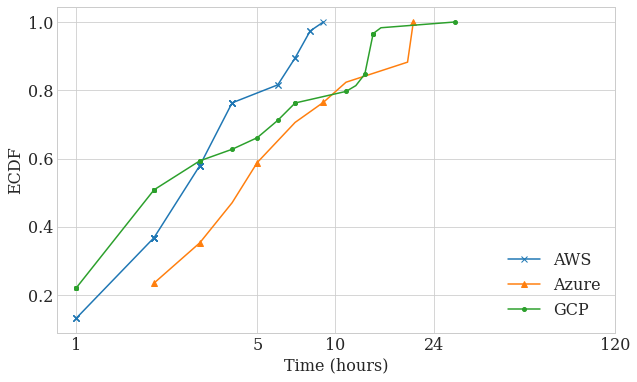

In [439]:
# ecdf graph maker 2018 setting

import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

df_aws_only = df_aws_only.sort_values(by= ['event_duration_hours'] )
ecdf = sm.distributions.ECDF(df_aws_only.event_duration_hours)
x_aws = df_aws_only.event_duration_hours
#x_aws = np.linspace(min(df_ecdf.aws_value), max(df_ecdf.aws_value))
y_aws = ecdf(x_aws)

df_azure_only = df_azure_only.sort_values(by= ['event_duration_hours'] )
ecdf = sm.distributions.ECDF(df_azure_only.event_duration_hours)
# x_azure = np.linspace(min(df_ecdf.azure_value), max(df_ecdf.azure_value))
x_azure = df_azure_only.event_duration_hours
y_azure = ecdf(x_azure)

df_gcp_only = df_gcp_only.sort_values(by= ['event_duration_hours'] )
ecdf = sm.distributions.ECDF(df_gcp_only.event_duration_hours)
# x_gcp = np.linspace(min(df_ecdf.gcp_value), max(df_ecdf.gcp_value))
x_gcp = df_gcp_only.event_duration_hours
y_gcp = ecdf(x_gcp)

#######

print('plot 7')

plt.plot(x_aws, y_aws, marker='x', linewidth = 1.5, markersize = 6.0 , markevery = 1)

plt.plot(x_azure, y_azure, marker='^', linewidth = 1.5, markersize = 6.0 , markevery = 4)

plt.plot(x_gcp, y_gcp, marker='.', linewidth = 1.5, markersize = 8.0 , markevery = 2)

plt.xlabel('Time (hours)')
plt.ylabel('ECDF')
# plt.title('Event duration ECDF 2018', fontdict={'fontsize': 15, 'fontweight': 'medium'})
plt.legend(['AWS', 'Azure', 'GCP'], loc= 'lower right')
# plt.grid(color='grey', linestyle='-', linewidth=1)
# plt.rcParams['axes.facecolor'] = 'white'

plt.xscale("log") # 2019
# plt.xscale("linear")

# plt.xticks([0,5,8,10,12,24,29])
# plt.xticks([1,5,10,15,20,24,29]) # 2020
plt.xticks([1,5,10,24,120],[1,5,10,24,120]) # 2018

plt.savefig('2020_ecdf.pdf', bbox_inches='tight')
plt.show()

plot 7


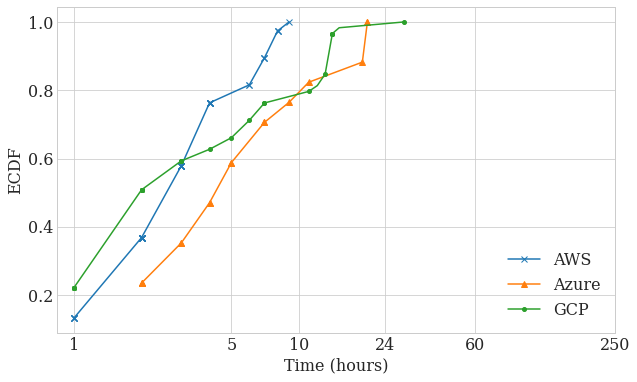

In [438]:
# ecdf graph maker 2019 setting

import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

df_aws_only = df_aws_only.sort_values(by= ['event_duration_hours'] )
ecdf = sm.distributions.ECDF(df_aws_only.event_duration_hours)
x_aws = df_aws_only.event_duration_hours
#x_aws = np.linspace(min(df_ecdf.aws_value), max(df_ecdf.aws_value))
y_aws = ecdf(x_aws)

df_azure_only = df_azure_only.sort_values(by= ['event_duration_hours'] )
ecdf = sm.distributions.ECDF(df_azure_only.event_duration_hours)
# x_azure = np.linspace(min(df_ecdf.azure_value), max(df_ecdf.azure_value))
x_azure = df_azure_only.event_duration_hours
y_azure = ecdf(x_azure)

df_gcp_only = df_gcp_only.sort_values(by= ['event_duration_hours'] )
ecdf = sm.distributions.ECDF(df_gcp_only.event_duration_hours)
# x_gcp = np.linspace(min(df_ecdf.gcp_value), max(df_ecdf.gcp_value))
x_gcp = df_gcp_only.event_duration_hours
y_gcp = ecdf(x_gcp)

#######

print('plot 7')

plt.plot(x_aws, y_aws, marker='x', linewidth = 1.5, markersize = 6.0 , markevery = 1)

plt.plot(x_azure, y_azure, marker='^', linewidth = 1.5, markersize = 6.0 , markevery = 1)

plt.plot(x_gcp, y_gcp, marker='.', linewidth = 1.5, markersize = 8.0 , markevery = 2)

plt.xlabel('Time (hours)')
plt.ylabel('ECDF')
# plt.title('Event duration ECDF 2019', fontdict={'fontsize': 15, 'fontweight': 'medium'})
plt.legend(['AWS', 'Azure', 'GCP'], loc= 'lower right')
# plt.grid(color='grey', linestyle='-', linewidth=1)
# plt.rcParams['axes.facecolor'] = 'white'

plt.xscale("log") # 2019
# plt.xscale("linear")

# plt.xticks([0,5,8,10,12,24,29])
# plt.xticks([1,5,10,15,20,24,29]) # 2020
plt.xticks([1,5,10,24,60,250],[1,5,10,24,60,250]) # first is ticks and second list is for labels

plt.savefig('2019_ecdf.pdf', bbox_inches='tight')
plt.show()

plot 7


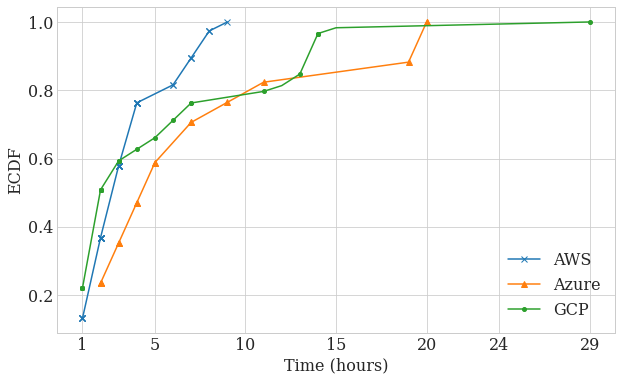

In [440]:
# ecdf graph maker 2020 setting

import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

df_aws_only = df_aws_only.sort_values(by= ['event_duration_hours'] )
ecdf = sm.distributions.ECDF(df_aws_only.event_duration_hours)
x_aws = df_aws_only.event_duration_hours
#x_aws = np.linspace(min(df_ecdf.aws_value), max(df_ecdf.aws_value))
y_aws = ecdf(x_aws)

df_azure_only = df_azure_only.sort_values(by= ['event_duration_hours'] )
ecdf = sm.distributions.ECDF(df_azure_only.event_duration_hours)
# x_azure = np.linspace(min(df_ecdf.azure_value), max(df_ecdf.azure_value))
x_azure = df_azure_only.event_duration_hours
y_azure = ecdf(x_azure)

df_gcp_only = df_gcp_only.sort_values(by= ['event_duration_hours'] )
ecdf = sm.distributions.ECDF(df_gcp_only.event_duration_hours)
# x_gcp = np.linspace(min(df_ecdf.gcp_value), max(df_ecdf.gcp_value))
x_gcp = df_gcp_only.event_duration_hours
y_gcp = ecdf(x_gcp)

#######

print('plot 7')

plt.plot(x_aws, y_aws, marker='x', linewidth = 1.5, markersize = 6.0 , markevery = 1)

plt.plot(x_azure, y_azure, marker='^', linewidth = 1.5, markersize = 6.0 , markevery = 1)

plt.plot(x_gcp, y_gcp, marker='.', linewidth = 1.5, markersize = 8.0 , markevery = 2)

plt.xlabel('Time (hours)')
plt.ylabel('ECDF')
# plt.title('Event duration ECDF 2020', fontdict={'fontsize': 15, 'fontweight': 'medium'})
plt.legend(['AWS', 'Azure', 'GCP'], loc= 'lower right')
# plt.grid(color='grey', linestyle='-', linewidth=1)
# plt.rcParams['axes.facecolor'] = 'white'

# plt.xscale("log") # 2019
# plt.xscale("linear")

# plt.xticks([0,5,8,10,12,24,29])
plt.xticks([1,5,10,15,20,24,29]) # 2020


plt.savefig('2018_ecdf.pdf', bbox_inches='tight')
plt.show()

<h4>Vendor vs Failure count</h4>

C:\Users\mahsa\Documents\anaconda3\envs\python_environment_2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  after removing the cwd from sys.path.


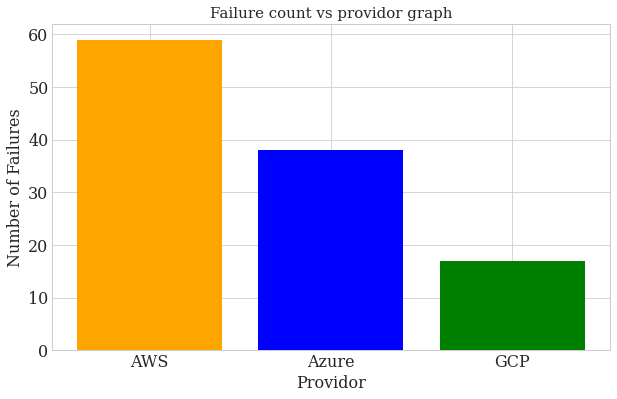

In [398]:
height_temp = pd.DataFrame()
height_temp = temp_df.vendor.value_counts()

height_temp.sort_values(0)

h1 = height_temp[0]
h2 = height_temp[1]
h3 = height_temp[2]
plt.bar( x = ['AWS', 'Azure', 'GCP'], height = [ h1,h2,h3 ] ,data = temp_df.vendor.value_counts, color= ['orange','b', 'g'] )

plt.xlabel('Providor')
plt.ylabel('Number of Failures')
plt.title('Failure count vs providor graph', fontdict={'fontsize': 15, 'fontweight': 'medium'})

plt.show()

In [399]:
vendor_col_index = temp_df.columns.get_loc('vendor')
count_unique(temp_df, vendor_col_index) # .sort_values(by= 'names')

,names,frequency
0,Azure,17.0
1,AWS,38.0
2,GCP,59.0


In [400]:
vendor_col_index = df_aws_only.columns.get_loc('vendor')
count_unique(df_aws_only, vendor_col_index)

,names,frequency
0,AWS,38.0


In [401]:
testing = pd.read_parquet('2020_all_data.parquet')  # reading excel causes some problem with some code like time conversion codes
monthly_data(testing)

C:\Users\mahsa\Documents\anaconda3\envs\python_environment_2\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Month,failure_count
0,Jan,34.0
1,Feb,18.0
2,Mar,48.0
3,Apr,9.0
4,May,4.0
5,Jun,1.0
6,Jul,NaN
7,Aug,NaN
8,Sep,NaN
9,Oct,NaN


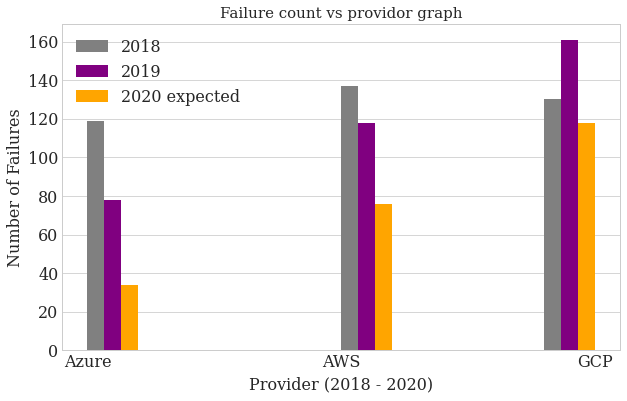

In [443]:
# fixed working

temp_2020 = pd.read_parquet('2020_all_data.parquet')
temp_2019 = pd.read_parquet('2019_all_data.parquet')
temp_2018 = pd.read_parquet('2018_all_data.parquet')

# remember to use sort on count values so they list as 1)Azure 2)AWS and 3)GCP

# 2020
vendor_col_index = temp_2020.columns.get_loc('vendor')
height_temp_20 = pd.DataFrame()
height_temp_20 = count_unique(temp_2020, vendor_col_index)

if (height_temp_20.iat[0,0] == 'Azure'):
    h1_2020 = height_temp_20.iat[0,1]

    if(height_temp_20.iat[1,0] == 'AWS'):
        h2_2020 = height_temp_20.iat[1,1]
        h3_2020 = height_temp_20.iat[2,1]

    else:
        h2_2020 = height_temp_20.iat[2,1]
        h3_2020 = height_temp_20.iat[1,1]


elif (height_temp_20.iat[1,0] == 'Azure'):
    h1_2020 = height_temp_20.iat[1,1]

    if(height_temp_20.iat[0,0] == 'AWS'):
        h2_2020 = height_temp_20.iat[0,1]
        h3_2020 = height_temp_20.iat[2,1]

    else:
        h2_2020 = height_temp_20.iat[2,1]
        h3_2020 = height_temp_20.iat[0,1]

elif (height_temp_20.iat[2,0] == 'Azure'):
    h1_2020 = height_temp_20.iat[2,1]

    if(height_temp_20.iat[1,0] == 'AWS'):
        h2_2020 = height_temp_20.iat[1,1]
        h3_2020 = height_temp_20.iat[2,1]

    else:
        h2_2020 = height_temp_20.iat[2,1]
        h3_2020 = height_temp_20.iat[1,1]


# 2019
vendor_col_index = temp_2019.columns.get_loc('vendor')
height_temp_19 = pd.DataFrame()
height_temp_19 = count_unique(temp_2019, vendor_col_index)

if (height_temp_19.iat[0,0] == 'Azure'):
    h1_2019 = height_temp_19.iat[0,1]

    if(height_temp_19.iat[1,0] == 'AWS'):
        h2_2019 = height_temp_19.iat[1,1]
        h3_2019 = height_temp_19.iat[2,1]

    else:
        h2_2019 = height_temp_19.iat[2,1]
        h3_2019 = height_temp_19.iat[1,1]


elif (height_temp_19.iat[1,0] == 'Azure'):
    h1_2019 = height_temp_19.iat[1,1]

    if(height_temp_19.iat[0,0] == 'AWS'):
        h2_2019 = height_temp_19.iat[0,1]
        h3_2019 = height_temp_19.iat[2,1]

    else:
        h2_2019 = height_temp_19.iat[2,1]
        h3_2019 = height_temp_19.iat[0,1]

elif (height_temp_19.iat[2,0] == 'Azure'):
    h1_2019 = height_temp_19.iat[2,1]

    if(height_temp_19.iat[1,0] == 'AWS'):
        h2_2019 = height_temp_19.iat[1,1]
        h3_2019 = height_temp_19.iat[2,1]

    else:
        h2_2019 = height_temp_19.iat[2,1]
        h3_2019 = height_temp_19.iat[1,1]


# 2018
vendor_col_index = temp_2018.columns.get_loc('vendor')
height_temp_18 = pd.DataFrame()
height_temp_18 = count_unique(temp_2018, vendor_col_index)

if (height_temp_18.iat[0,0] == 'Azure'):
    h1_2018 = height_temp_18.iat[0,1]

    if(height_temp_18.iat[1,0] == 'AWS'):
        h2_2018 = height_temp_18.iat[1,1]
        h3_2018 = height_temp_18.iat[2,1]

    else:
        h2_2018 = height_temp_18.iat[2,1]
        h3_2018 = height_temp_18.iat[1,1]


elif (height_temp_18.iat[1,0] == 'Azure'):
    h1_2018 = height_temp_18.iat[1,1]

    if(height_temp_18.iat[0,0] == 'AWS'):
        h2_2018 = height_temp_18.iat[0,1]
        h3_2018 = height_temp_18.iat[2,1]

    else:
        h2_2018 = height_temp_18.iat[2,1]
        h3_2018 = height_temp_18.iat[0,1]

elif (height_temp_18.iat[2,0] == 'Azure'):
    h1_2018 = height_temp_18.iat[2,1]

    if(height_temp_18.iat[1,0] == 'AWS'):
        h2_2018 = height_temp_18.iat[1,1]
        h3_2018 = height_temp_18.iat[2,1]

    else:
        h2_2018 = height_temp_18.iat[2,1]
        h3_2018 = height_temp_18.iat[1,1]


# plot
plt.hist( x = (['Azure', 'AWS', 'GCP'], ['Azure', 'AWS', 'GCP'], ['Azure', 'AWS', 'GCP'] ) ,  weights= ([int(h1_2018) , int(h2_2018), int(h3_2018)], [int(h1_2019), int(h2_2019), int(h3_2019)], [int(h1_2020), int(h2_2020), int(h3_2020) ]), color = ['grey','purple','orange'] , align = 'mid', rwidth= 20, )

# data = [df_aws_only.vendor, df_azure_only, df_gcp_only ] 

plt.grid(axis='x', b=False) # donot show x axis grid     # ['Azure', 'AWS', 'GCP'] [h1_2020, h2_2020, h3_2020]

plt.xlabel('Provider (2018 - 2020)', labelpad= 6)
plt.ylabel('Number of Failures')
plt.title('Failure count vs providor graph', fontdict={'fontsize': 15, 'fontweight': 'medium'})
plt.legend(['2018', '2019', '2020'], loc= 'best')

# plt.xlabel('2020                    2019                2018')
# plt.xlabel('2020',)

In [403]:
height_temp_20

,names,frequency
0,Azure,17.0
1,AWS,38.0
2,GCP,59.0


In [404]:
# height_temp_20.frequency.dtypes
h2_2018

137.0

In [405]:
height_temp_19

,names,frequency
0,Azure,78.0
1,AWS,118.0
2,GCP,161.0


In [406]:
height_temp_18

,names,frequency
0,Azure,119.0
1,AWS,137.0
2,GCP,130.0


In [407]:
df_monthly_count["Month"] = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_monthly_count["failure_count"] = np.NaN 
series_month_count = temp_df.groupby(pd.Grouper(key='event_start_time',freq='M'))['vendor'].count()
# series_month_count  # this is a series and not a data frame

i = 0 

while (i < series_month_count.size):
    df_monthly_count["failure_count"].loc[i] = series_month_count[i]

    i = i + 1

df_monthly_count

C:\Users\mahsa\Documents\anaconda3\envs\python_environment_2\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Month,failure_count
0,Jan,34.0
1,Feb,18.0
2,Mar,48.0
3,Apr,9.0
4,May,4.0
5,Jun,1.0
6,Jul,NaN
7,Aug,NaN
8,Sep,NaN
9,Oct,NaN


In [408]:
# some_df = temp_2020.groupby(['event_start_time', 'vendor'])['vendor'].count().unstack()  # working
# some_df

In [409]:
df_aws_only_2020, df_azure_only_2020, df_gcp_only_2020  = seperate_vendor_from_all_data(temp_2020) # working
# df_aws_only_2020.head()

Total rows =  114
len df_aws_only =  38
len df_azure_only =  17
len df_gcp_only =  59
Check total rows =  114


In [410]:
df_aws_only_2020, df_azure_only_2020, df_gcp_only_2020  = seperate_vendor_from_all_data(temp_2020)
df_aws_only_2019, df_azure_only_2019, df_gcp_only_2019  = seperate_vendor_from_all_data(temp_2019)
df_aws_only_2018, df_azure_only_2018, df_gcp_only_2018  = seperate_vendor_from_all_data(temp_2018)

df_aws_only_monthly_2020 = monthly_data(df_aws_only_2020)
df_azure_only_monthly_2020 = monthly_data(df_azure_only_2020)
df_gcp_only_monthly_2020 = monthly_data(df_gcp_only_2020)

df_aws_only_monthly_2019 = monthly_data(df_aws_only_2019)
df_azure_only_monthly_2019 = monthly_data(df_azure_only_2019)
df_gcp_only_monthly_2019 = monthly_data(df_gcp_only_2019)

df_aws_only_monthly_2018 = monthly_data(df_aws_only_2018)
df_azure_only_monthly_2018 = monthly_data(df_azure_only_2018)
df_gcp_only_monthly_2018 = monthly_data(df_gcp_only_2018)

df_2020_monthly = monthly_data(temp_2020)
df_2019_monthly = monthly_data(temp_2019)
df_2018_monthly = monthly_data(temp_2018)

Total rows =  114
len df_aws_only =  38
len df_azure_only =  17
len df_gcp_only =  59
Check total rows =  114
Total rows =  114
len df_aws_only =  38
len df_azure_only =  17
len df_gcp_only =  59
Check total rows =  114
Total rows =  114
len df_aws_only =  38
len df_azure_only =  17
len df_gcp_only =  59
Check total rows =  114


C:\Users\mahsa\Documents\anaconda3\envs\python_environment_2\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [411]:
df_aws_only_monthly_2020

,Month,failure_count
0,Jan,16.0
1,Feb,4.0
2,Mar,9.0
3,Apr,5.0
4,May,4.0
5,Jun,NaN
6,Jul,NaN
7,Aug,NaN
8,Sep,NaN
9,Oct,NaN


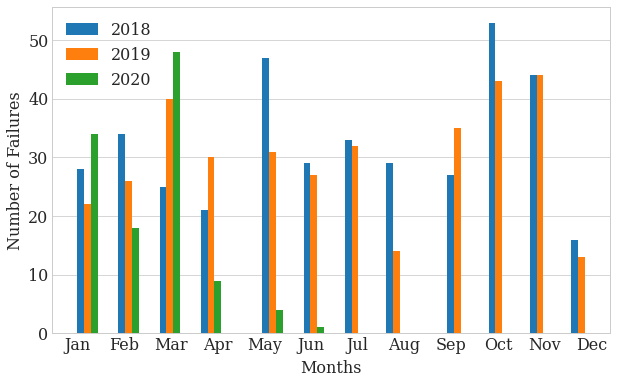

In [446]:
plt.hist(weights= ([df_2018_monthly.failure_count, df_2019_monthly.failure_count, df_2020_monthly.failure_count]), x = ([df_aws_only_monthly_2018.Month, df_aws_only_monthly_2019.Month, df_aws_only_monthly_2020.Month ]) , align = 'mid', rwidth= 20, bins = 25, )

# plt.xticks(df_aws_only_monthly_2020.Month)
plt.grid(axis='x', b=False) # donot show x axis grid     # ['Azure', 'AWS', 'GCP'] [h1_2020, h2_2020, h3_2020]

plt.xlabel('Months', labelpad= 6)
plt.ylabel('Number of Failures')
# plt.title('Year vs Failure count', fontdict={'fontsize': 15, 'fontweight': 'medium'})
plt.legend(['2018', '2019', '2020'], loc= 'best')

#plt.rcParams["figure.figsize"] = [8,8]

plt.savefig('monthly_data_4.pdf', bbox_inches='tight')

plt.show()

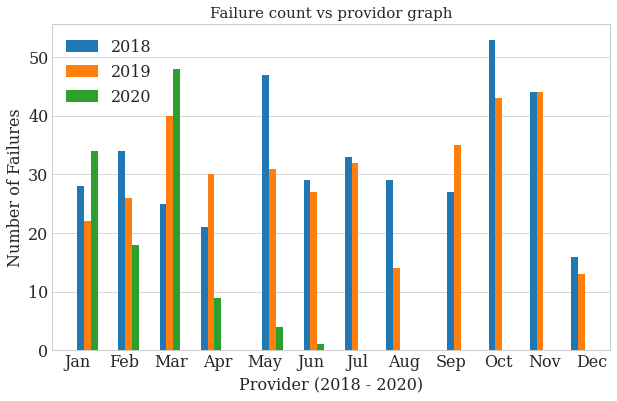

In [413]:
plt.hist(weights= ([df_2018_monthly.failure_count, df_2019_monthly.failure_count, df_2020_monthly.failure_count]), x = ([df_aws_only_monthly_2018.Month, df_aws_only_monthly_2019.Month, df_aws_only_monthly_2020.Month ]) , align = 'mid', rwidth= 20, bins = 25, )

# plt.xticks(df_aws_only_monthly_2020.Month)
plt.grid(axis='x', b=False) # donot show x axis grid     # ['Azure', 'AWS', 'GCP'] [h1_2020, h2_2020, h3_2020]

plt.xlabel('Provider (2018 - 2020)', labelpad= 6)
plt.ylabel('Number of Failures')
plt.title('Failure count vs providor graph', fontdict={'fontsize': 15, 'fontweight': 'medium'})
plt.legend(['2018', '2019', '2020'], loc= 'best')

# plt.rcParams["figure.figsize"] = [16,20]

plt.show()

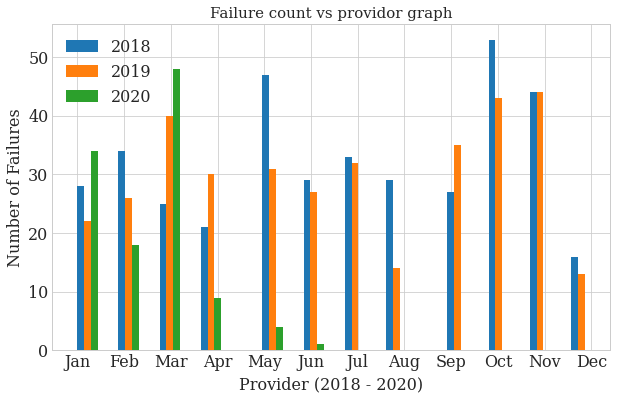

In [414]:
plt.hist(weights= ([df_2018_monthly.failure_count, df_2019_monthly.failure_count, df_2020_monthly.failure_count]), x = ([df_aws_only_monthly_2018.Month, df_aws_only_monthly_2019.Month, df_aws_only_monthly_2020.Month ]) , align = 'mid', rwidth= 20, bins = 25)

# plt.xticks(df_aws_only_monthly_2020.Month)

plt.xlabel('Provider (2018 - 2020)', labelpad= 6)
plt.ylabel('Number of Failures')
plt.title('Failure count vs providor graph', fontdict={'fontsize': 15, 'fontweight': 'medium'})
plt.legend(['2018', '2019', '2020'], loc= 'best')

plt.show()

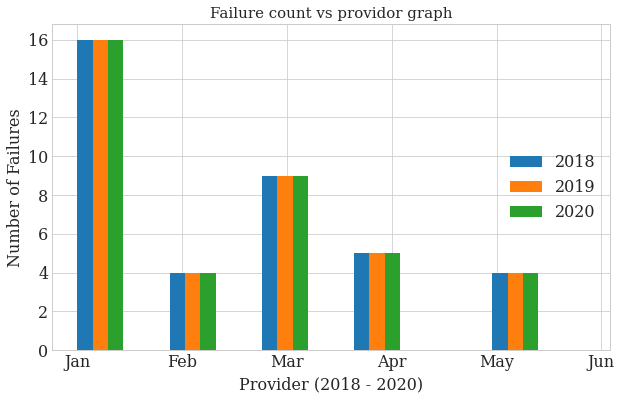

In [415]:
plt.hist(weights= ([df_aws_only_monthly_2018.failure_count, df_aws_only_monthly_2019.failure_count, df_aws_only_monthly_2020.failure_count]), x = ([df_aws_only_monthly_2018.Month, df_aws_only_monthly_2019.Month, df_aws_only_monthly_2020.Month ]) , align = 'mid', rwidth= 20, bins = 25)

# plt.xticks(df_aws_only_monthly_2020.Month)

plt.xlabel('Provider (2018 - 2020)', labelpad= 6)
plt.ylabel('Number of Failures')
plt.title('Failure count vs providor graph', fontdict={'fontsize': 15, 'fontweight': 'medium'})
plt.legend(['2018', '2019', '2020'], loc= 'right')

plt.show()

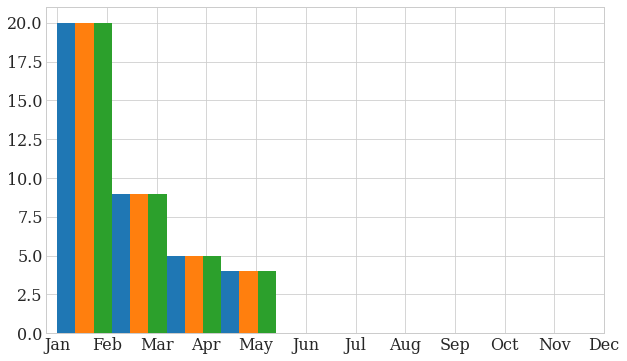

In [416]:
plt.hist(weights= ([df_aws_only_monthly_2018.failure_count, df_aws_only_monthly_2019.failure_count, df_aws_only_monthly_2020.failure_count]), x = ([df_aws_only_monthly_2018.Month, df_aws_only_monthly_2019.Month, df_aws_only_monthly_2020.Month ]) , align = 'mid', rwidth= 20)

plt.xticks(df_aws_only_monthly_2020.Month)

# plt.figure(figsize=(20, 4))
plt.yscale('linear')

plt.show()

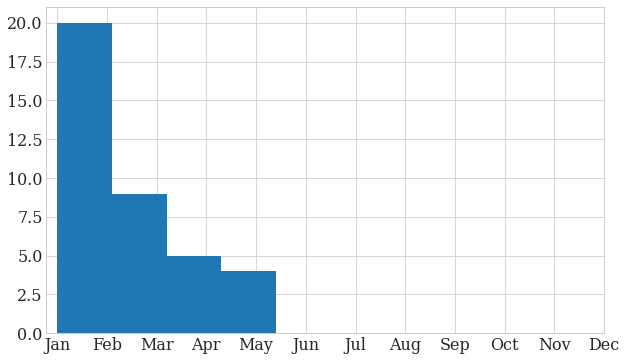

In [417]:
plt.hist(weights= df_aws_only_monthly_2020.failure_count, x = df_aws_only_monthly_2020.Month  , align = 'mid', rwidth= 20)
plt.xticks(df_aws_only_monthly_2020.Month)

# plt.figure(figsize=(20, 4))

plt.show()

C:\Users\mahsa\Documents\anaconda3\envs\python_environment_2\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


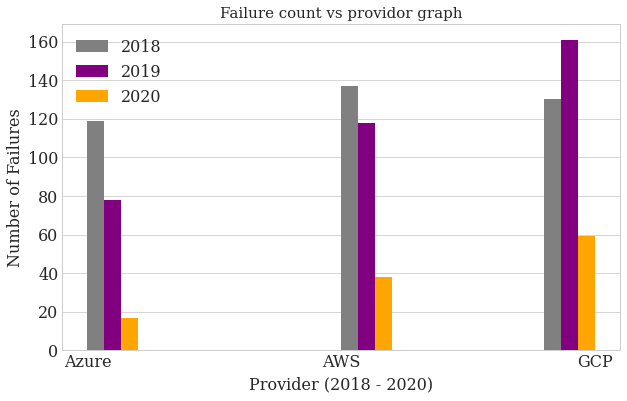

In [418]:
monthly_failure_count_2020 = monthly_data(temp_2020)
monthly_failure_count_2019 = monthly_data(temp_2019)
monthly_failure_count_2018 = monthly_data(temp_2018)

# plot
plt.hist( x = (['Azure', 'AWS', 'GCP'], ['Azure', 'AWS', 'GCP'], ['Azure', 'AWS', 'GCP'] ) ,  weights= ([int(h1_2018) , int(h2_2018), int(h3_2018)], [int(h1_2019), int(h2_2019), int(h3_2019)], [int(h1_2020), int(h2_2020), int(h3_2020) ]), color = ['grey','purple','orange'] , align = 'mid', rwidth= 20 )

# data = [df_aws_only.vendor, df_azure_only, df_gcp_only ] 

plt.grid(axis='x', b=False) # donot show x axis grid     # ['Azure', 'AWS', 'GCP'] [h1_2020, h2_2020, h3_2020]

plt.xlabel('Provider (2018 - 2020)', labelpad= 6)
plt.ylabel('Number of Failures')
plt.title('Failure count vs providor graph', fontdict={'fontsize': 15, 'fontweight': 'medium'})
plt.legend(['2018', '2019', '2020'], loc= 'best')

(array([[2., 0., 0., 0., 0., 8., 0., 0., 0., 1.],
        [4., 0., 0., 0., 0., 4., 0., 0., 0., 5.],
        [2., 0., 0., 0., 0., 4., 0., 0., 0., 5.]]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 3 BarContainer objects>)

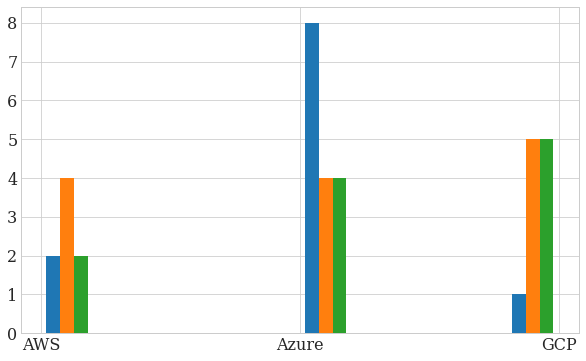

In [419]:

plt.hist( x = (['AWS', 'Azure', 'GCP'], ['AWS', 'Azure', 'GCP'], ['AWS', 'Azure', 'GCP']) , data = ([df_aws_only.vendor], [df_azure_only], [df_gcp_only] ),  weights= ([2,8,1], [4,4,5], [2,4,5]))
# plt.xlabel('2020                    2019                2018')
# plt.xlabel('2020',)

Text(0.5, 0, '2020          2019                2018')

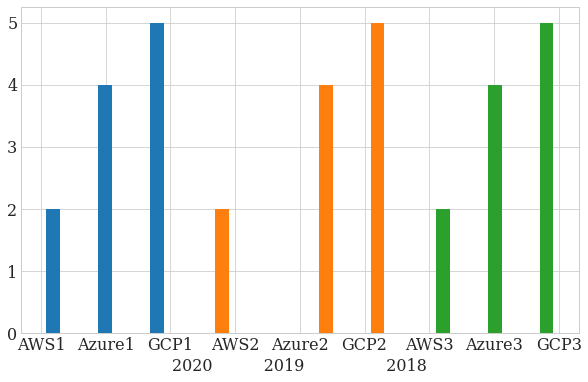

In [420]:
plt.hist( x = (['AWS1', 'Azure1', 'GCP1'], ['AWS2', 'Azure2', 'GCP2'], ['AWS3', 'Azure3', 'GCP3']) , data = ([df_aws_only.vendor], [df_azure_only], [df_gcp_only] ),  weights= ([2,4,5], [2,4,5], [2,4,5]))
plt.xlabel('2020          2019                2018')

In [421]:
# filling blanks is done above 

# temp_df['location'] = temp_df['location'].fillna('Unknown')
# print("filled empty location cell")

# temp_df.to_csv("2020_only.csv")

Text(0.5, 1.0, 'AWS status graph')

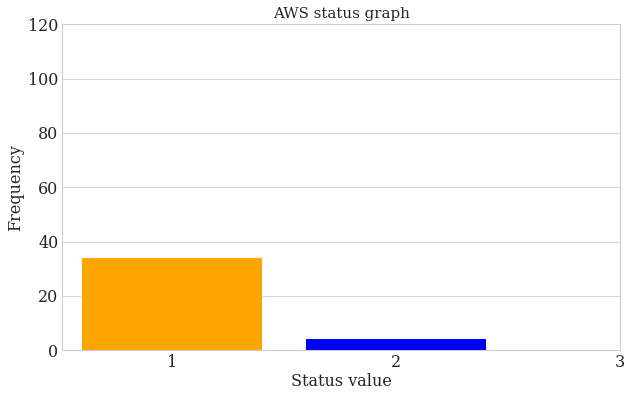

In [422]:
# status 2020 aws
status_col_index = df_aws_only.columns.get_loc('status')
df_aws_status = count_unique(df_aws_only, status_col_index).sort_values(by='frequency', ascending=True)

plt.bar(x= df_aws_status.names, height= df_aws_status.frequency, color = ['blue', 'orange', 'green'])
plt.xticks([1,2,3])
plt.yticks([0,20,40,60,80,100,120])

plt.grid(axis='x', b=False) # donot show x axis grid     # ['Azure', 'AWS', 'GCP'] [h1_2020, h2_2020, h3_2020]

plt.xlabel('Status value', labelpad= 2)
plt.ylabel('Frequency')
plt.title('AWS status graph', fontdict={'fontsize': 15, 'fontweight': 'medium'})

In [423]:
# make one plot at at time

# sns.countplot(x = 'status' , data = df_aws_only)

# sns.countplot(x = 'status' , data = df_azure_only, )

# sns.countplot(x = 'status' , data = df_gcp_only, )


<AxesSubplot:xlabel='status', ylabel='count'>

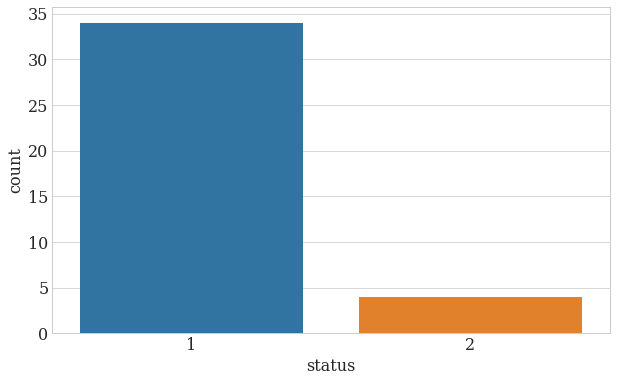

In [424]:
sns.countplot(x = 'status' , data = df_aws_only)         #  palette="Set2"

<AxesSubplot:xlabel='status', ylabel='count'>

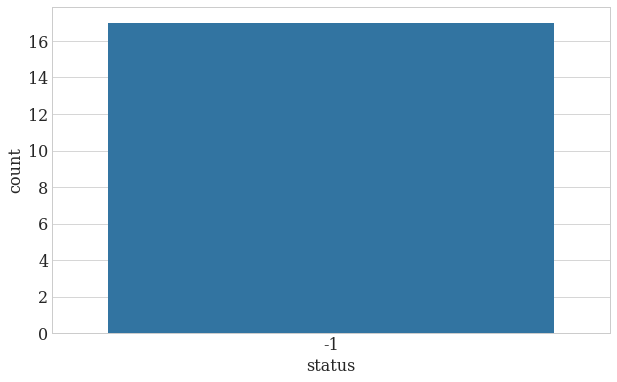

In [425]:
sns.countplot(x = 'status' , data = df_azure_only )

<AxesSubplot:xlabel='status', ylabel='count'>

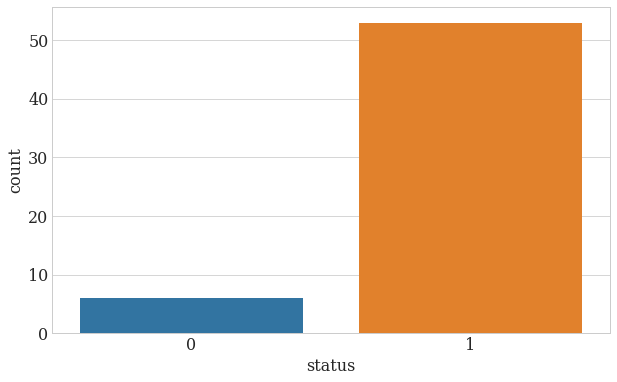

In [426]:
sns.countplot(x = 'status' , data = df_gcp_only)

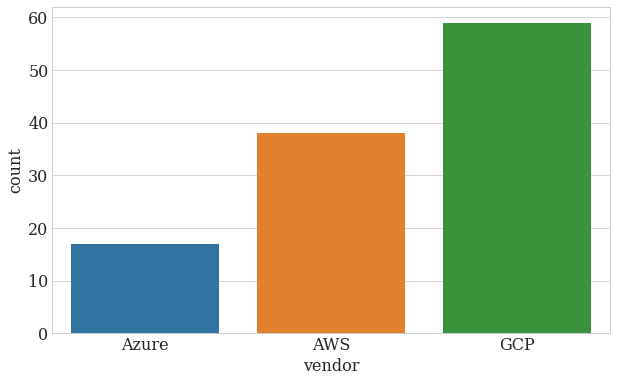

In [427]:
count_vendor_plot = sns.countplot(x = 'vendor', data = temp_df)

# count_vendor_plot.figure.savefig('2020_count_vendor_plot.png')

<AxesSubplot:>

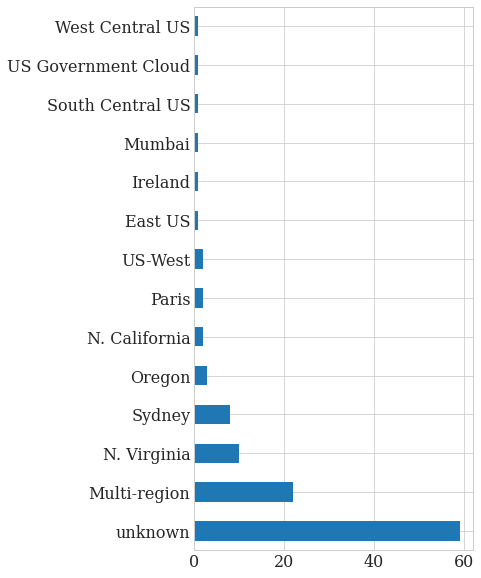

In [428]:
fig = plt.figure(figsize=(5, 10))
temp_df['location'].value_counts().plot(kind='barh')# .figure.savefig('2018_count_location_plot_2.png',  bbox_inches='tight')

In [429]:
temp_df['location'].value_counts()

unknown                59
Multi-region           22
N. Virginia            10
Sydney                  8
Oregon                  3
N. California           2
Paris                   2
US-West                 2
East US                 1
Ireland                 1
Mumbai                  1
South Central US        1
US Government Cloud     1
West Central US         1
Name: location, dtype: int64

In [430]:
# temp_df.vendor.hist(cumulative=True, density=1, bins=100)

In [431]:
# add empty NAN column at a specific position
h1_df = temp_df

h1_df['h1'] = np.nan

h1_df = h1_df[['service_id', 'service_name', 'location', 'status', 'event_start_time', 'event_end_time', 'h1', 'first_notification', 'last_notification', 'description', 'vendor', 'monitor', 'org_type']]

# 'service_id', 'service_name', 'location', 'status', 'event_start_time', 'event_end_time', 'first_notification', 'last_notification', 'description', 'vendor', 'monitor', 'org_type'

In [432]:
# h1_df.head()

In [433]:
import datetime as dt
# h1_df.h1 = h1_df.h1.astype(dt.timedelta).map(lambda x: np.nan if pd.isnull(x) else x.days)

In [434]:
h1_df.h1 = ( h1_df.event_end_time - h1_df.event_start_time )

C:\Users\mahsa\Documents\anaconda3\envs\python_environment_2\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [435]:
h1_df.h1.dtype

dtype('<m8[ns]')

In [436]:
h1_df.head()

,service_id,service_name,location,status,event_start_time,event_end_time,h1,first_notification,last_notification,description,vendor,monitor,org_type
0,unknown,all,East US,-1,2020-03-03 15:30:00,2020-03-03 22:00:00,0 days 06:30:00,1969-12-31 23:59:59,1969-12-31 23:59:59,"\nRCA- Issues connecting to resources in East US (Tracking ID 9SS0-VT8)\nSummary of Impact: Between 15:30 and 22:00 UTC on 03 March 2020, a subset of customers in East US may have experienced issues connecting to resources in this region. Root Cause: A malfunction in building automation control caused temperatures in multiple rooms of a data center in the East US region to spike impacting Storage, Compute, Networking and other dependent services. Although the cooling system has N+1 redundancy, the automation failure resulted in a significant reduction in cooling air flow. This caused a cascade of events which caused network devices to become unresponsive, VMs to shutdown, and some storage hardware to go offline. Mitigation: The malfunction in the building automation control was fixed by resetting the controllers for the cooling system. Due to the nature of the automation failure, each cooling unit had to be manually reset. By 16:00 UTC the cooling controller was back online and ambient temperatures and air flow had returned to normal ranges. Engineers then power cycled and restored failed server hardware in groups to restore services in the region. After recovery of the building and network infrastructure, engineers recovered storage hardware and compute VMs that did not recover automatically. By 22:00 UTC, 99.999% of affected VMs were back up and running. Availability of all storage data was restored.Next steps: We sincerely apologize for the impact to affected customers. We are continuously taking steps to improve the Microsoft Azure Platform and our processes to help ensure such incidents do not occur in the future. In this case, this includes (but is not limited to):Review of the building automation control system responsible for this incident, mitigation of any issues if found, and application of the mitigation to other data centers with the same control systemReview of mechanical cooling system, mitigation of any issues if found, and application of the mitigation to other data centers with the same cooling system.Provide Feedback: Please help us improve the Azure customer communications experience by taking our survey https://aka.ms/9SS0-VT8\n",Azure,Azure,cloud
1,lambda-eu-west-1,AWS Lambda,Ireland,1,2020-01-08 08:05:00,2020-01-08 09:20:00,0 days 01:15:00,2020-01-08 09:26:00,2020-01-08 09:26:00,"5:26 PM PST \nBetween 4:05 PM PST and 5:20 PM PST, customers using Lambda functions to process events from Kinesis Data Streams and DynamoDB Streams experienced significant delays in event processing for a subset of functions in the EU-WEST-1 Region. The issue has been resolved and the service is operating normally. The backlogged events will be processed by the function over the next few hours as per the retry policy on the event source mapping on the affected functions.",AWS,AWS,cloud
2,chime,Amazon Chime,Multi-region,2,2020-01-15 03:49:00,2020-01-15 07:08:00,0 days 03:19:00,2020-01-15 04:26:00,2020-01-15 07:11:00,"12:26 PM PST \nWe are currently investigating increased application faults and decreased availability for Amazon Chime.12:45 PM PST \nWe have identified the root cause of the increased application faults and decreased availability for Amazon Chime. Customers who are already signed into the Chime Client are not advised to logout, or select the re-connection option. 1:36 PM PST \nWe have identified the root cause of the increased application faults and decreased availability for Amazon Chime, and can confirm recovery for some users. Customers who are already signed into the Chime Client are not advised to logout, or select the re-connection option, as we continue to work towards resolution. 2:30 PM PST \nWe have identified the root cause of the increas